# (ii)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Parâmetros da simulação
N_real = 100  # valor real de N
k = 5         # tamanho da amostra
num_simulacoes = 10000

# Lista para armazenar as estimativas
estimativas_N = []

for _ in range(num_simulacoes):
    # Amostra aleatória sem reposição
    amostra = np.random.choice(range(1, N_real + 1), size=k, replace=False)
    M = max(amostra)  # maior número observado

    # Estimativa insesgada de N
    N_hat = M + M / k - 1
    estimativas_N.append(N_hat)

# Convertendo para array numpy
estimativas_N = np.array(estimativas_N)

# Estatísticas descritivas
media = np.mean(estimativas_N)
desvio_padrao = np.std(estimativas_N)

# Exibição dos resultados
print(f"Média das estimativas: {media:.2f}")
print(f"Desvio padrão das estimativas: {desvio_padrao:.2f}")

Média das estimativas: 99.78
Desvio padrão das estimativas: 16.67


Análise:
- Alta variabilidade: O desvio padrão de ~16 mostra que há bastante incerteza associada à estimativa quando $k=5$. Isso é esperado: com poucas observações por amostra, o valor do máximo pode variar bastante de uma amostra para outra.

# (iii)
Construa um histograma com as estimativas obtidas na simulação do item anterior e analise o comportamento do estimador $\hat{N}$. Ele é viesado? Subestima ou superestima frequentemente o verdadeiro valor de $N$?

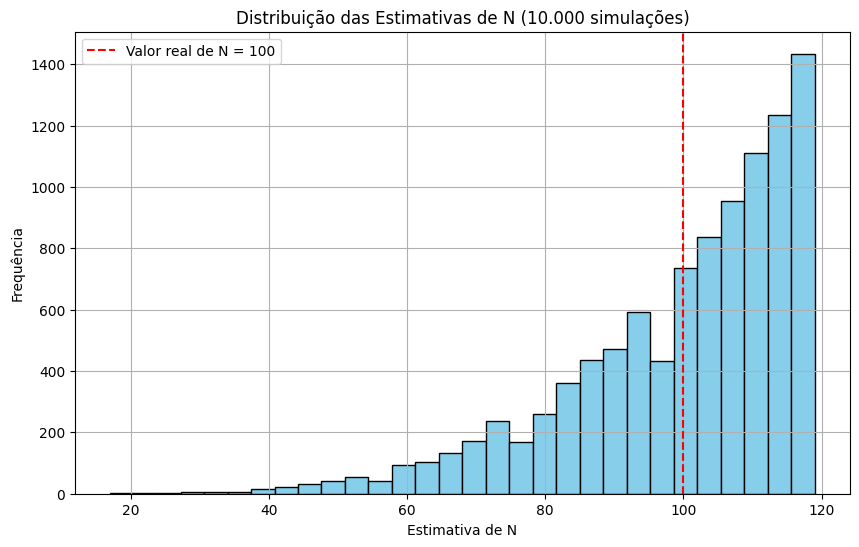

In [ ]:
# Histograma
plt.figure(figsize=(10,6))
plt.hist(estimativas_N, bins=30, color='skyblue', edgecolor='black')
plt.axvline(N_real, color='red', linestyle='--', label='Valor real de N = 100')
plt.title('Distribuição das Estimativas de N (10.000 simulações)')
plt.xlabel('Estimativa de N')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()

Análise:
- $\hat{N}$ é um estimador não-viesado: A média das estimativas é extremamente próxima de 100, confirmando que $\hat{N}$ é um estimador não-viesado.
- O histograma das estimativas $\hat{N}$, apesar de ter média próxima de 100, apresenta uma distribuição assimétrica à esquerda.
- A maioria das estimativas tende a subestimar o valor real de 𝑁, e poucas realizam superestimações próximas ou ligeiramente acima de 100.

# (iv) Calcule a média, a variância e o desvio padrão das estimativas geradas pela simulação que usa $k=5$. Compare com o valor real de $N = 100$ e discuta os resultados.

Resultados das estatísticas descritivas para as **estimativas $\hat{N}$** obtidas em 10.000 simulações com $k = 5$ e $N = 100$:

| Estatística         | Valor            |
|---------------------|------------------|
| Média               | 99.78            |
| Desvio Padrão       | 16.67            |
| Valor real de $N$   | 100              |

Análise:
- A média das estimativas $\hat{N} \approx 99.78$ é extremamente próxima do valor real $N = 100$, confirmando que o **estimador é não-viesado**:
  $
  \mathbb{E}[\hat{N}] \approx N
  $

- O desvio padrão $\approx 16.67$ indica que as estimativas individuais $\hat{N}$ variam bastante. Isso reflete a **alta incerteza** associada ao uso de uma **amostra pequena $k = 5$**.

- Embora $\hat{N}$ seja um estimador não-viesado, **cada estimativa isolada pode estar bem longe de 100**, para mais ou para menos. Portanto, **confiar em uma única amostra com $k = 5$** pode levar a erros grandes, mesmo que a média das estimativas esteja correta no longo prazo.

Na simulação a seguir, podemos ver como o desvio-padrão diminui conforme o tamanho da amostra aumenta.
> Quanto maior o número de tanques observados, mais precisa se torna a estimativa de $N$ — ou seja, menor a incerteza da estimativa.

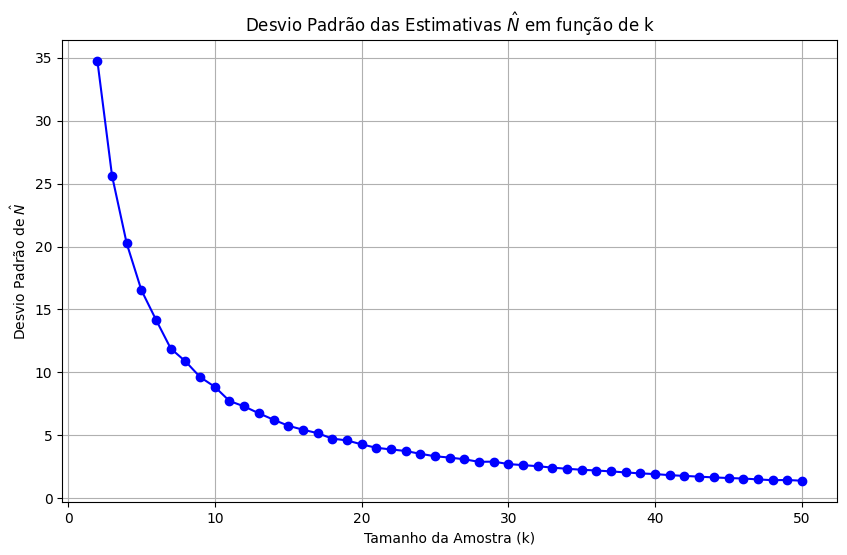

In [ ]:
# Avaliar como o desvio padrão das estimativas varia com diferentes valores de k
k_values = range(2, 51)
std_devs = []

for k in k_values:
    estimates = []
    for _ in range(num_simulacoes):
        sample = np.random.choice(range(1, N_real + 1), size=k, replace=False)
        M = max(sample)
        N_hat = M + M / k - 1
        estimates.append(N_hat)
    std_dev = np.std(estimates, ddof=1)
    std_devs.append(std_dev)

# Plot do desvio padrão em função de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, std_devs, color='blue', marker='o')
plt.title('Desvio Padrão das Estimativas $\\hat{N}$ em função de k')
plt.xlabel('Tamanho da Amostra (k)')
plt.ylabel('Desvio Padrão de $\\hat{N}$')
plt.grid(True)
plt.show()

# (v) Proponha um intervalo de confiança para $N$ com base nas simulações. Discuta se o verdadeiro valor ($N = 100$) costuma estar dentro do intervalo estimado.

O gráfico mostra como o intervalo de confiança empírico de 95% para N varia com o tamanho da amostra k:

- Limite inferior: cresce conforme k aumenta.
- Limite superior: diminui com o aumento de k.
- Linha vermelha: o valor verdadeiro de N=100, que está contido nos intervalos em todos os casos testados

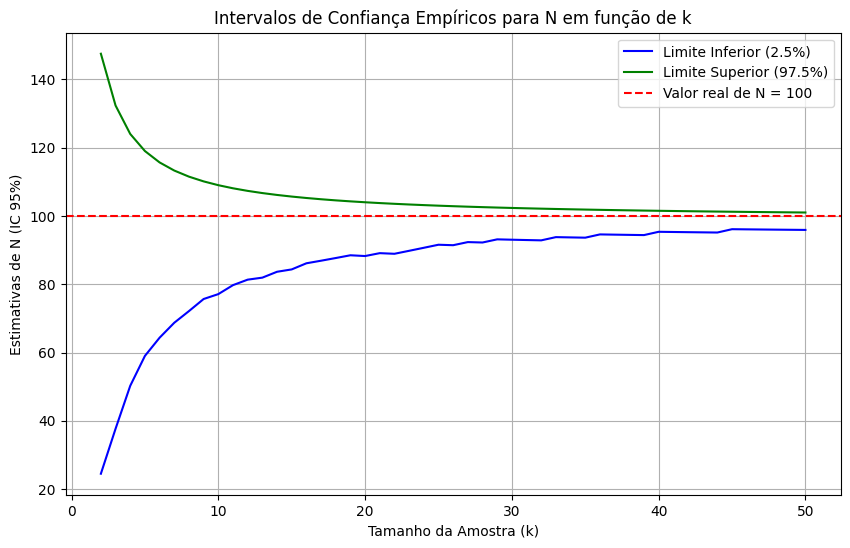

In [ ]:
import matplotlib.pyplot as plt

# Testar vários valores de k
k_range = range(2, 51)
ci_bounds = []

for k in k_range:
    estimates = []
    for _ in range(num_simulacoes):
        sample = np.random.choice(range(1, N_real + 1), size=k, replace=False)
        M = max(sample)
        N_hat = M + M / k - 1
        estimates.append(N_hat)

    lower = np.percentile(estimates, 2.5)
    upper = np.percentile(estimates, 97.5)
    ci_bounds.append((lower, upper))

# Separar limites inferior e superior
ci_lowers, ci_uppers = zip(*ci_bounds)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, ci_lowers, label='Limite Inferior (2.5%)', color='blue')
plt.plot(k_range, ci_uppers, label='Limite Superior (97.5%)', color='green')
plt.axhline(N_real, color='red', linestyle='--', label='Valor real de N = 100')
plt.title('Intervalos de Confiança Empíricos para N em função de k')
plt.xlabel('Tamanho da Amostra (k)')
plt.ylabel('Estimativas de N (IC 95%)')
plt.legend()
plt.grid(True)
plt.show()

Análise:
- Quanto maior for $k$, mais estreito e mais preciso é o intervalo de confiança. Isso mostra claramente o ganho em precisão com amostras maiores, mesmo quando usamos estimativas baseadas apenas no máximo observado.